<a href="https://colab.research.google.com/github/solobala/DLL30/blob/main/DLL30_DZ5_results.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0. Импорт библиотек и пользовательские функции

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob

In [55]:
def plot_results(model_type: str, augmentation_type: str, sheduler_types: list,  columns: list):
  """Ф-я для визуализации потерь, accuracy и time для разных шедулеров"""
  fig = plt.figure(figsize=(15, 5))

  plt.subplot(1,3,1)
  plt.title('val_loss', fontsize=15)
  for sheduler_type in sheduler_types:
    x = filtered_results[(filtered_results['augmentation'] == augmentation_type) &(filtered_results['sheduler'] == sheduler_type)][columns[0]]
    y = filtered_results[(filtered_results['augmentation'] == augmentation_type) &(filtered_results['sheduler'] == sheduler_type)][columns[1]]
    plt.plot(x,y)
    plt.ylabel('val_loss', fontsize=15)
    plt.xlabel('эпоха', fontsize=15)
    plt.legend(sheduler_types)
  plt.subplot(1,3,2)
  plt.title('val_Accuracy', fontsize=15)
  for sheduler_type in sheduler_types:
    x = filtered_results[(filtered_results['augmentation'] == augmentation_type) &(filtered_results['sheduler'] == sheduler_type)][columns[0]]
    y = filtered_results[(filtered_results['augmentation'] == augmentation_type) &(filtered_results['sheduler'] == sheduler_type)][columns[2]]
    plt.plot(x,y)
    plt.ylabel('val_accuracy', fontsize=15)
    plt.xlabel('эпоха', fontsize=15)
    plt.legend(sheduler_types)
  plt.subplot(1,3,3)
  plt.title('time', fontsize=15)
  for sheduler_type in sheduler_types:
    x = filtered_results[(filtered_results['augmentation'] == augmentation_type) &(filtered_results['sheduler'] == sheduler_type)][columns[0]]
    y = filtered_results[(filtered_results['augmentation'] == augmentation_type) &(filtered_results['sheduler'] == sheduler_type)][columns[3]]
    plt.plot(x,y)
    plt.ylabel('Время обучения', fontsize=15)
    plt.xlabel('эпоха', fontsize=15)
    plt.legend(sheduler_types)
  plt.show()

In [73]:
def plot_results_(model_type: str, sheduler_type: str, aug_types: list,  columns: list):
  """Ф-я для визуализации потерь, accuracy и time для разных аугментаций"""
  fig = plt.figure(figsize=(15, 5))

  plt.subplot(1,3,1)
  plt.title('val_loss', fontsize=15)
  for aug_type in aug_types:
    x = filtered_results[(filtered_results['augmentation'] == aug_type) &(filtered_results['sheduler'] == sheduler_type)][columns[0]]
    y = filtered_results[(filtered_results['augmentation'] == aug_type) &(filtered_results['sheduler'] == sheduler_type)][columns[1]]
    plt.plot(x,y)
    plt.ylabel('val_loss', fontsize=15)
    plt.xlabel('эпоха', fontsize=15)
    plt.legend(aug_types)
  plt.subplot(1,3,2)
  plt.title('val_Accuracy', fontsize=15)
  for aug_type in aug_types:
    x = filtered_results[(filtered_results['augmentation'] == aug_type) &(filtered_results['sheduler'] == sheduler_type)][columns[0]]
    y = filtered_results[(filtered_results['augmentation'] == aug_type) &(filtered_results['sheduler'] == sheduler_type)][columns[2]]
    plt.plot(x,y)
    plt.ylabel('val_accuracy', fontsize=15)
    plt.xlabel('эпоха', fontsize=15)
    plt.legend(aug_types)
  plt.subplot(1,3,3)
  plt.title('time', fontsize=15)
  for aug_type in aug_types:
    x = filtered_results[(filtered_results['augmentation'] == aug_type) &(filtered_results['sheduler'] == sheduler_type)][columns[0]]
    y = filtered_results[(filtered_results['augmentation'] == aug_type) &(filtered_results['sheduler'] == sheduler_type)][columns[3]]
    plt.plot(x,y)
    plt.ylabel('Время обучения', fontsize=15)
    plt.xlabel('эпоха', fontsize=15)
    plt.legend(aug_types)
  plt.show()

# 1. Загрузка  результатов обучения моделей

In [89]:
! wget "https://raw.githubusercontent.com/solobala/DLL30/main/treatment.csv"

--2023-12-25 14:14:16--  https://raw.githubusercontent.com/solobala/DLL30/main/treatment.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19297 (19K) [text/plain]
Saving to: ‘treatment.csv’

treatment.csv       100%[===================>]  18.84K  --.-KB/s    in 0s      

2023-12-25 14:14:16 (52.9 MB/s) - ‘treatment.csv’ saved [19297/19297]



In [90]:
# csv файлы с результатами обучения моделей, хранящиеся в Github, были сохранены в общем файле
whole_results = pd.read_csv('/content/treatment.csv', sep=';')
whole_results.head()

,model,augmentation,sheduler,time,lr,epoch,train_loss,train_accuracy,val_loss,val_accuracy
0,с нуля,Base,None,267.864162,0.01,0,2.873252,0.199982,2.575637,0.310922
1,с нуля,Base,None,140.857679,0.01,1,2.229409,0.417210,2.040682,0.455808
2,с нуля,Base,None,142.063044,0.01,2,1.748658,0.551789,1.943337,0.501578
3,с нуля,Base,None,142.682200,0.01,3,1.408464,0.647241,1.996519,0.511206
4,с нуля,Base,None,140.123212,0.01,4,1.164262,0.708598,2.832264,0.436553


# 3. Анализ влияния шедулеров на качество модели

[ноутбук на Kaggle](https://www.kaggle.com/code/marinabalakina/dll30-dz5-ipynb)


[Ссылка на гитхаб](https://github.com/solobala/DLL30/blob/main/dll30-dz5_final.ipynb)

In [32]:
model_types = whole_results[(whole_results['augmentation']=='Base')]['model'].unique().tolist()

In [33]:
print(' Использованные типы моделей: ', * model_types)

 Использованные типы моделей:  с нуля feature_extractor fine_tuning


## 3.1. Кривые оценки моделей на тестовых данных при отсутствии шедулера, использовании различных шедулеров и комбинаций из них  при обучении модели  с нуля и базовой аугментации данных

In [34]:
sheduler_types = whole_results[(whole_results['model']=='с нуля')&(whole_results['augmentation']=='Base')]['sheduler'].unique().tolist()

In [35]:
print(' Использованные шедулеры: ', * sheduler_types)

 Использованные шедулеры:  None MultiStep Combo1


In [21]:
# sheduler_types.remove('Combo2')

При обучении модели с нуля были использованы следующие варианты шедулеров:
* без шедулера, шаг обучения lr=0.01
* без шедулера, увеличенный шаг обучения lr=0.1
* шедулер Multistep, увеличенный стартовый шаг обучения lr=0.2
* Комбинация 2 шедулеров - Multistep и ReduceLROnPlateau, обучение 10 эпох, увеличенный стартовый шаг обучения lr=0.2
Из сравнения исключен вариант с последовательным использованием 2 шедулеров (Multistep в теченние 10 эпох и ReduceLROnPlateau в течение еще 7 эпох), т.к сравнение обученния в течение различного к-ва эпох будет некорректным

In [36]:
whole_results[(whole_results['model']=='с нуля')&(whole_results['augmentation']=='Base')].sort_values(by=['augmentation','model','sheduler', 'lr','epoch'])

,model,augmentation,sheduler,time,lr,epoch,train_loss,train_accuracy,val_loss,val_accuracy
26,с нуля,Base,Combo1,141.602257,[0.0001],6,2.207176,0.425602,2.206051,0.433712
27,с нуля,Base,Combo1,140.905636,[0.0001],7,2.162760,0.438328,2.201509,0.435448
28,с нуля,Base,Combo1,140.193199,[0.0001],8,2.158948,0.439975,2.190319,0.436553
29,с нуля,Base,Combo1,142.055526,[0.0001],9,2.150089,0.442370,2.186774,0.439552
20,с нуля,Base,Combo1,141.620295,[0.001],0,2.900539,0.194656,2.661766,0.291824
21,с нуля,Base,Combo1,140.189362,[0.001],1,2.527828,0.328602,2.527170,0.329388
22,с нуля,Base,Combo1,139.084298,[0.001],2,2.462689,0.345656,2.465089,0.347854
23,с нуля,Base,Combo1,138.941292,[0.001],3,2.398507,0.366262,2.404854,0.361585
24,с нуля,Base,Combo1,139.579869,[0.001],4,2.330895,0.386270,2.352201,0.384154
25,с нуля,Base,Combo1,140.479002,[0.001],5,2.266349,0.406750,2.274043,0.413984


In [58]:
filtered_results = whole_results[(whole_results['model']=='с нуля')&(whole_results['augmentation']=='Base')]
filtered_results.shape[0]

30

In [59]:
filtered_results

,model,augmentation,sheduler,time,lr,epoch,train_loss,train_accuracy,val_loss,val_accuracy
0,с нуля,Base,None,267.864162,0.01,0,2.873252,0.199982,2.575637,0.310922
1,с нуля,Base,None,140.857679,0.01,1,2.229409,0.417210,2.040682,0.455808
2,с нуля,Base,None,142.063044,0.01,2,1.748658,0.551789,1.943337,0.501578
3,с нуля,Base,None,142.682200,0.01,3,1.408464,0.647241,1.996519,0.511206
4,с нуля,Base,None,140.123212,0.01,4,1.164262,0.708598,2.832264,0.436553
5,с нуля,Base,None,142.059045,0.01,5,0.983590,0.755132,1.517249,0.602904
6,с нуля,Base,None,139.797607,0.01,6,0.857296,0.780265,1.239365,0.676610
7,с нуля,Base,None,139.558009,0.01,7,0.763597,0.804204,1.356788,0.646622
8,с нуля,Base,None,139.335842,0.01,8,0.675294,0.825888,1.399874,0.650726
9,с нуля,Base,None,139.517842,0.01,9,0.612400,0.842102,1.087181,0.721433


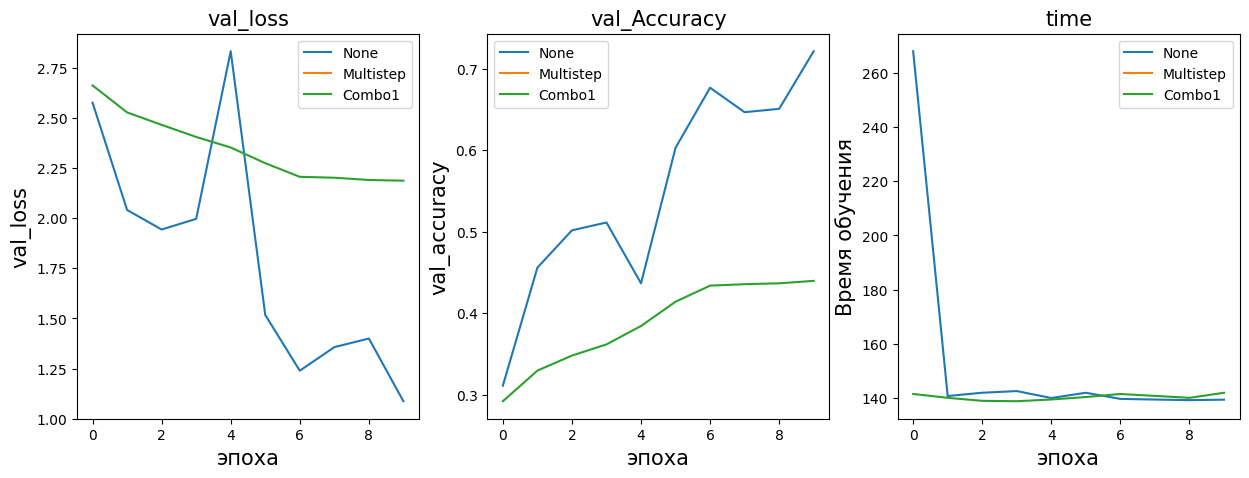

In [60]:
plot_results(model_type='с нуля', augmentation_type='Base', sheduler_types=sheduler_types, columns=['epoch', 'val_loss', 'val_accuracy', 'time'])


В данной модели при выбранных величинах шага обучения при обучении с нуля в течение 10 эпох модель не успевает обучиться.Именно поэтому наилучшее значение accuracy на тесте достигается без использования шедулеров.

При использовании шедулеров кривые обучения на тесте имеют более плавный характер, на протяжении 10 эпох не имеет таких резких взлетов и падений. Кривые обучения для Combo1 И MultistepLR практически совпадают и на графике сливаются в одну. Качество моделей - ниже, чем без использования шедулеров. Причина - в неоправданном уменьшении шага обучения недообученной модели

Временные затраты практически не отличаются.

Вывод:  

Использование шедулеров на недообученной модели с выбранным начальным шагом обучения и выбранном к-ве эпох нецелесообразно.


## 3.2. Кривые оценки моделей на тестовых данных при отсутствии шедулера, использовании различных шедулеров и комбинаций из них  при применении feature_extraction и базовой аугментации данных

In [61]:
filtered_results = whole_results[(whole_results['model']=='feature_extractor')&(whole_results['augmentation']=='Base')]
filtered_results.shape[0]

30

In [42]:
sheduler_types = filtered_results[(filtered_results['model']=='feature_extractor')&(filtered_results['augmentation']=='Base')]['sheduler'].unique().tolist()

In [43]:
print(' Использованные шедулеры: ', * sheduler_types)

 Использованные шедулеры:  None Multistep Combo1


При обучении модели с использованием feature extraction были использованы следующие варианты шедулеров:
* без шедулера, шаг обучения lr=0.01
* шедулер Multistep,  стартовый шаг обучения lr=0.01
* Комбинация 2 шедулеров - Multistep и ReduceLROnPlateau, обучение 10 эпох, увеличенный стартовый шаг обучения lr=0.01

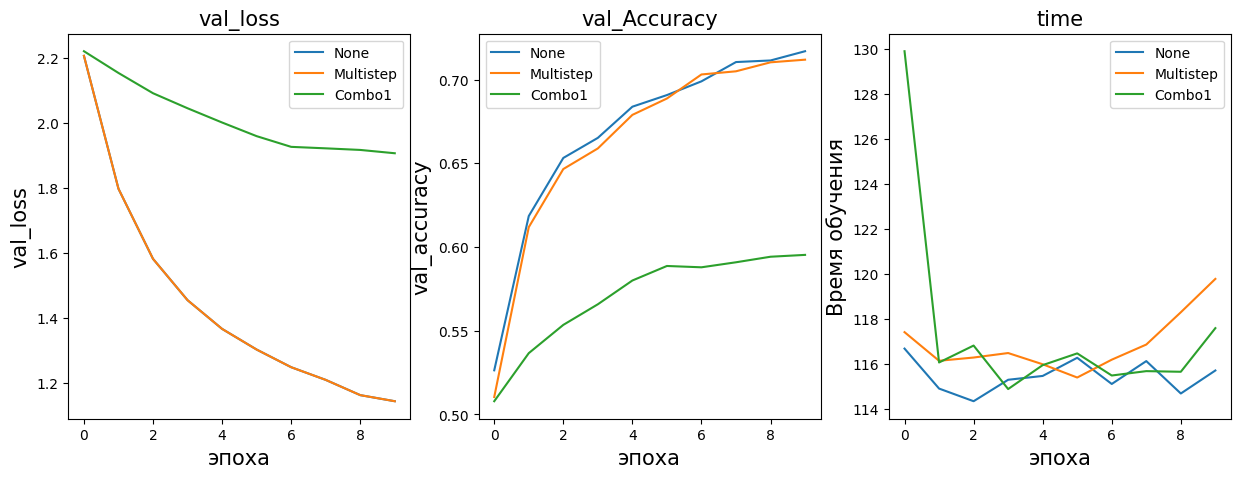

In [63]:
plot_results(model_type='feature_extractor', augmentation_type='Base', sheduler_types=sheduler_types, columns=['epoch', 'val_loss', 'val_accuracy', 'time'])

Вывод: кривые ф-ии потерь без шедулера и с использовванием Multistep практически сливаются в одну, на графике они неразличимы, но в табличных данных есть небольшая разница. При использовании комбинации шедулеров существенно понижается качество модели и возрастают потери на тесте (причина - опять-таки уменьшение шага обучения в недообученной модели). Временные затраты при использовании шедулеров также выше, чем без них.

Вывод: И при feature_extraction, как и при обучении с нуля, приенение шедулеров также нецелесообразно.

## 3.3. Кривые оценки моделей на тестовых данных при отсутствии шедулера, использовании различных шедулеров и комбинаций из них  при применении fine tuning модели и базовой аугментации данных

In [64]:
filtered_results = whole_results[(whole_results['model']=='fine_tuning')&(whole_results['augmentation']=='Base')]
filtered_results.shape[0]

30

In [65]:
filtered_results

,model,augmentation,sheduler,time,lr,epoch,train_loss,train_accuracy,val_loss,val_accuracy
60,fine_tuning,Base,None,139.973334,0.01,0,1.731664,0.589814,0.794470,0.814867
61,fine_tuning,Base,None,140.505969,0.01,1,0.557839,0.869248,0.468631,0.883365
62,fine_tuning,Base,None,140.698085,0.01,2,0.310518,0.925734,0.376747,0.910827
63,fine_tuning,Base,None,139.739985,0.01,3,0.189549,0.956601,0.313311,0.918087
64,fine_tuning,Base,None,140.776490,0.01,4,0.118427,0.975024,0.290187,0.929766
65,fine_tuning,Base,None,140.282747,0.01,5,0.074280,0.986627,0.274949,0.932449
66,fine_tuning,Base,None,140.524755,0.01,6,0.049705,0.992423,0.263865,0.936237
67,fine_tuning,Base,None,140.678230,0.01,7,0.034289,0.995698,0.260167,0.937184
68,fine_tuning,Base,None,142.247294,0.01,8,0.024291,0.997748,0.259410,0.937973
69,fine_tuning,Base,None,140.910807,0.01,9,0.018024,0.998226,0.261688,0.937816


In [66]:
sheduler_types = filtered_results[(filtered_results['model']=='fine_tuning')&(filtered_results['augmentation']=='Base')]['sheduler'].unique().tolist()

In [67]:
print(' Использованные шедулеры: ', * sheduler_types)

 Использованные шедулеры:  None Multistep Combo1


При обучении модели с использованием fine_tuning были использованы следующие варианты шедулеров:
* без шедулера, шаг обучения lr=0.01
* шедулер Multistep,  стартовый шаг обучения lr=0.01
* Комбинация 2 шедулеров - Multistep и ReduceLROnPlateau, обучение 10 эпох,  стартовый шаг обучения lr=0.01

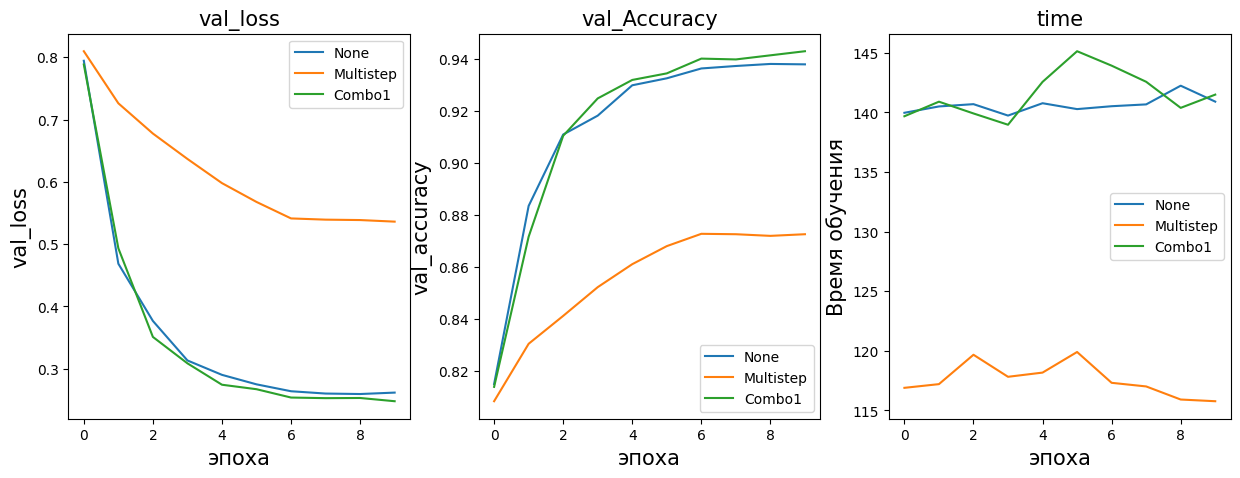

In [68]:
plot_results(model_type='fine_tuning', augmentation_type='Base', sheduler_types=sheduler_types, columns=['epoch', 'val_loss', 'val_accuracy', 'time'])

Кривые обучения при использовании комбинации шедулеров и при отсутствии шедулера практически сливаются в одну, различия минимальны. Лучшее значение accuracy на тесте достигается при использовании комбинации шедулеров, но это улучшение менее 1 % и к тому же связано с возврастанием суммарного времени обучения модели. Качество модели на тесте при использовании только MultiStepLR оказалось хуже, чем в двух других случаях, зато и время обучения значительно сократилось.

Вывод: При использовании предобученных моделей использование шедулеров может привести к повышению качества, однако это требует правильного выбора шедулера и параметров его настройки.

# 4. Анализ влияния аугментации на качество модели

4.1. Влияние аугментации на качество модели при обучении с нуля

Эксперименты ставились с использованием 3 вариантов аугментации данных:
* Base (как в лекции),
* good (подбор опций, которые предположительно должны повысить качество модели)
* bad (подбор опций, которые предположительно должны понизить качество модели)

In [69]:
aug_types = whole_results[(whole_results['model']=='с нуля')]['augmentation'].unique().tolist()

In [71]:
print(' Использованные варианты аугментации: ', * aug_types)

 Использованные варианты аугментации:  Base good bad


In [77]:
filtered_results = whole_results[(whole_results['model']=='с нуля')&(whole_results['sheduler']=='None')]
filtered_results.shape[0]

30

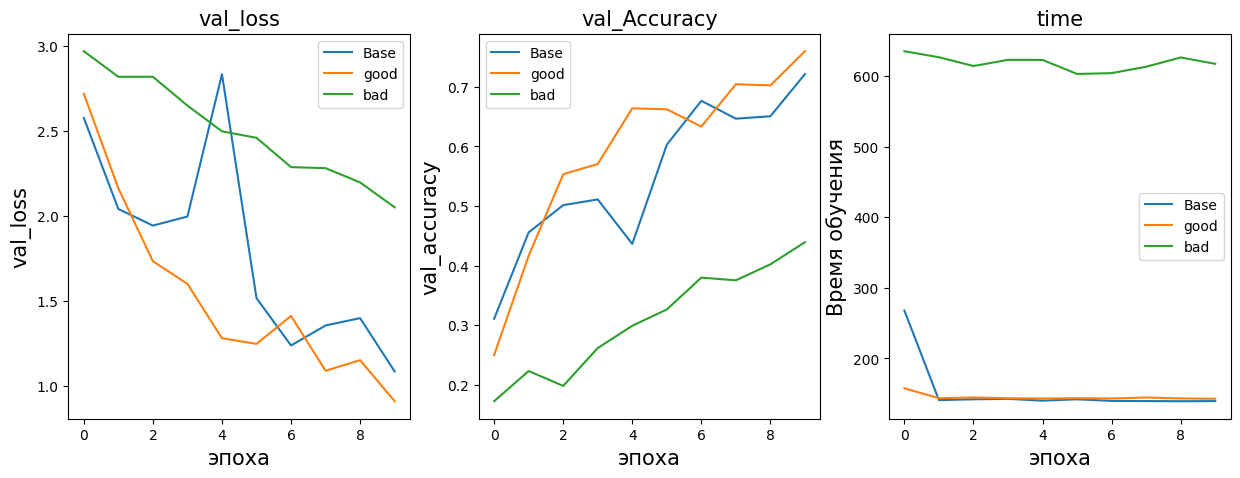

In [78]:
plot_results_(model_type='с нуля', sheduler_type='None', aug_types=aug_types, columns=['epoch', 'val_loss', 'val_accuracy', 'time'])

Вывод:
При обучении модели правильный выбор опций для аугментации является яочень важным. Ошибки при выборе опций могут не только существенно снизить качество модели, но и увеличить время ее обучения. Как видно из представленных графиков, правильно подобранные опции позволяют снизить потери, придать кривой более плавный характер, повысить accuracy и уменьшить суммарное время обучения

4.1. Влияние аугментации на качество модели при обучении с использованием feature_extraction

In [84]:
filtered_results = whole_results[(whole_results['model']=='feature_extractor')&(whole_results['sheduler']=='None')]
filtered_results.shape[0]

30

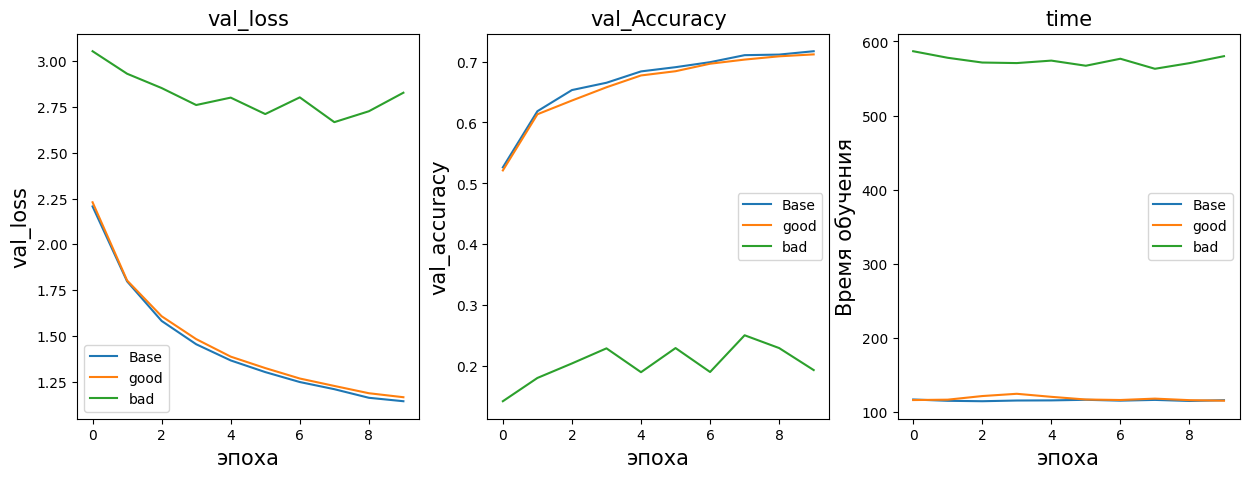

In [85]:
plot_results_(model_type='feature_extractor', sheduler_type='None', aug_types=aug_types, columns=['epoch', 'val_loss', 'val_accuracy', 'time'])

Вывод
При использовании Feature_extraction разница в качестве моделей и времени их обучения для base и good набора опций аугментации несущественна. Однако опции из bad-набора значительно снижабт accuracy, увеличивают потери и время обучения модели

4.3. Влияние аугментации на качество модели при обучении с использованием fine tuning

In [87]:
filtered_results = whole_results[(whole_results['model']=='fine_tuning')&(whole_results['sheduler']=='None')]
filtered_results.shape[0]

30

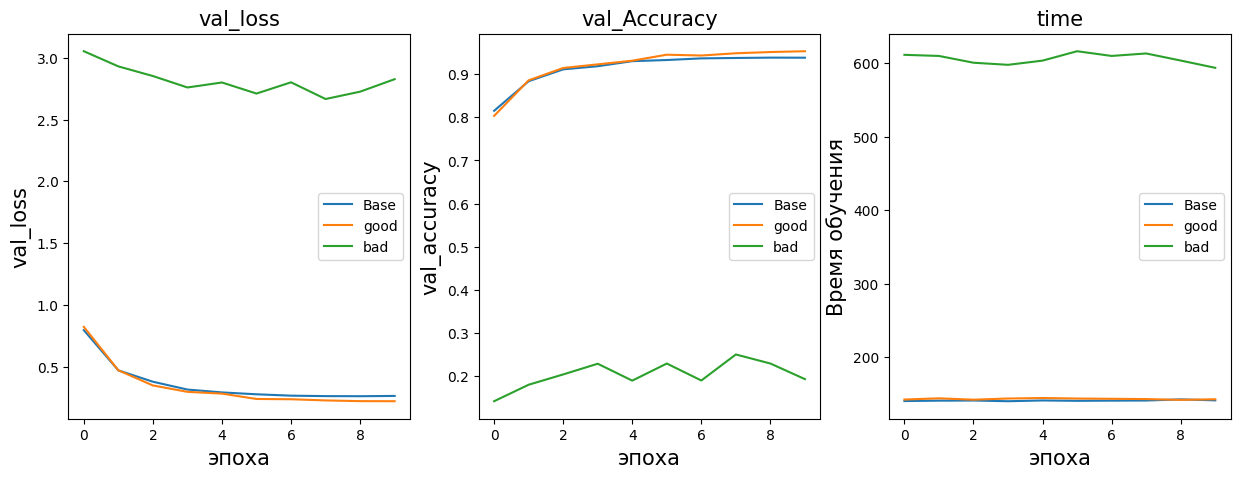

In [88]:
plot_results_(model_type='fine_tuning', sheduler_type='None', aug_types=aug_types, columns=['epoch', 'val_loss', 'val_accuracy', 'time'])

Вывод:
При использовании Fine_tuning неправильный выбор опций аугментации так же пагубно сказывается на качестве модели и времени ее обучения, как и в предыдущих случаях. Однако, в отличие от Feature_extraction, good аугментация приводит к чуть более высокому качеству и чуть меньшим потерям, чем базовый набор опций.